# **1. MME 실습**

## **1-1. 적률 추정량 구하기**

- 확률 변수 $X_1, X_2,  ... , X_n$가 이항 분포 Binomial(1, $p$)의 표본일 때, $p$와 $p(1-p)$의 적률추정량 구하기

In [1]:
import numpy as np

In [2]:
x_list = np.random.binomial(n=1 , p=0.2 , size=10000)
print(x_list)

[0 0 0 ... 1 0 0]


In [3]:
def moment(x_list, k):
    n = len(x_list)
    sum_xk = 0
    for x in x_list:
        sum_xk += x**k
    res = sum_xk/n
    return res

In [4]:
moment1 = moment(x_list, 1)
print(moment1)

0.2015


In [5]:
moment2 = moment(x_list, 2)
print(moment2)

0.2015


In [6]:
moment2 - moment1**2

0.16089775

## **1-2. MME 구하기**

- 확률 변수 $X_1, X_2,  ... , X_n$가 감마 분포 $\Gamma(\alpha, \beta)$의 표본일 때, $\alpha$와 $\beta$의 MME 구하기

In [7]:
x_list = np.random.gamma(shape=3, scale=2, size=10000)
print(x_list)

[ 6.69689915 12.99517353  5.7660723  ...  3.40553734  5.2009399
  2.95284958]


In [8]:
moment1 = moment(x_list, 1)
print(moment1)

6.000835209982279


In [9]:
moment2 = moment(x_list, 2)
print(moment2)

48.25858308394392


In [10]:
alpha_hat = (moment1**2)/(moment2 - moment1**2)
print(alpha_hat)

2.9399393569209162


In [11]:
beta_hat = (moment2 - moment1**2)/moment1
print(beta_hat)

2.0411425139963186


# **2. MLE 실습**

## **2-1. MLE 구현하기**

- 파이썬

In [12]:
27/38

0.7105263157894737

In [13]:
def seq(start, stop, step):
    """
    수열 만들기
    입력값: start(시작 값), stop(끝 값), step(한 스텝당 증가 수)
    출력값: res(리스트)
    """
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def factorial(x):
    """
    팩토리얼 함수
    입력값: 정수 x
    출력값: x!
    """
    x_list = list(range(1, x+1))
    res = 1
    for val in x_list:
        res *= val
    return res

def combination(n, x):
    """
    조합
    입력값: n, x
    출력값: nCx(실수)
    """
    res = factorial(n)/(factorial(x)*factorial(n-x))
    return res

In [14]:
# 상황 설명
# 레알마드리드가 리그 38경기 중 27번을 승리했음

# 먼저 내가 가지고 있는 자료가 38번 시행 중 27번 성공했다는 데이터를 가지고 있다고 하자
# 이때 p=0.1일 경우 해당 사건이 발생할 확률은 다음과 같다
n = 38
x = 27
p = 0.1

In [15]:
prob = combination(n,x)*(p**x)*((1-p)**(n-x))
print(prob)

3.7761528448566324e-19


In [16]:
n = 38
x = 27
p = 0.7

prob = combination(n,x)*(p**x)*((1-p)**(n-x))
print(prob)

0.14007571343647338


In [17]:
n = 38
x = 27
p_list = seq(0, 1, 0.01)
probs = []

for p in p_list:
    prob = combination(n,x)*(p**x)*((1-p)**(n-x))
    probs.append(prob)

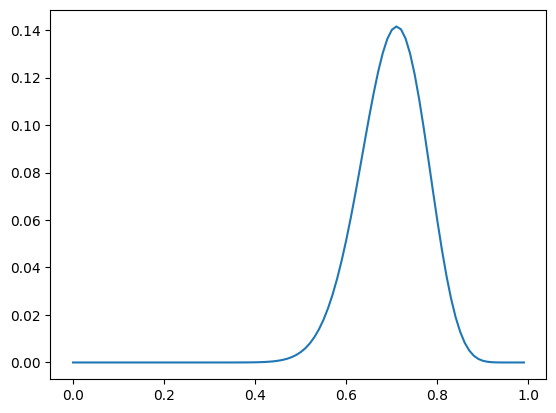

In [18]:
import matplotlib.pyplot as plt

plt.plot(p_list, probs)
plt.show()

In [19]:
max(probs)

0.14149312976895556

In [20]:
probs.index(max(probs))

71

In [21]:
probs[71]

0.14149312976895556

In [22]:
# 따라서 MLE는 다음과 같다
p_list[71]

0.7100000000000004

- 라이브러리

In [23]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [24]:
n = 38
x = 27
p = 0.1

prob = binom.pmf(k=x, n=n, p=p)
print(prob)

3.776152844856644e-19


In [25]:
n = 38
x = 27
p = 0.7

prob = binom.pmf(k=x, n=n, p=p)
print(prob)

0.14007571343647332


In [26]:
n = 38
x = 27
p_list = np.arange(0, 1, 0.01)
probs = []

for p in p_list:
    prob = binom.pmf(k=x, n=n, p=p)
    probs.append(prob)

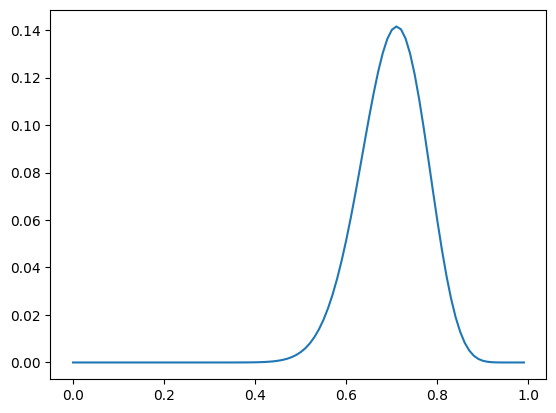

In [27]:
plt.plot(p_list, probs)
plt.show()

In [28]:
np.argmax(probs)

71

In [29]:
max(probs)

0.14149312976895548

In [30]:
probs[71]

0.14149312976895548

In [31]:
# 따라서 MLE는 다음과 같다
p_list[71]

0.71

## **2-2. 가능도 함수 그려보기**

- 정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도 함수를 그려보자

In [63]:
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,935 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [66]:
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"
plt.rc("axes", unicode_minus = False)

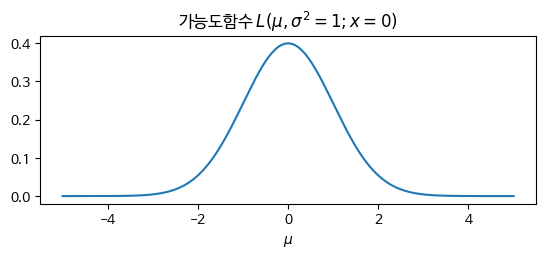

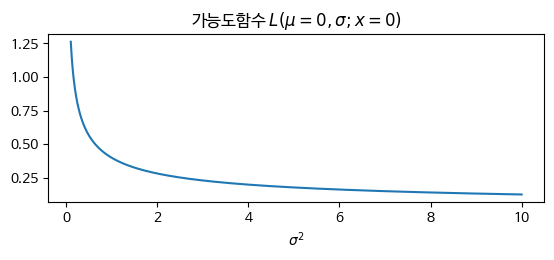

In [67]:
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.title("가능도함수 $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("가능도함수 $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

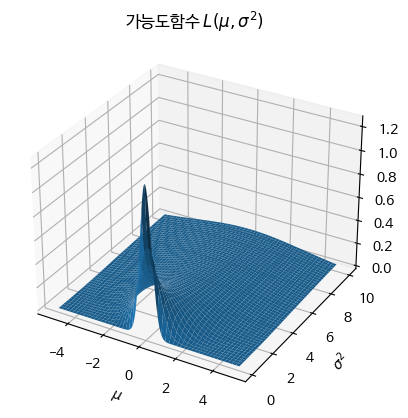

In [69]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('가능도함수 $L(\mu, \sigma^2)$')
plt.show()

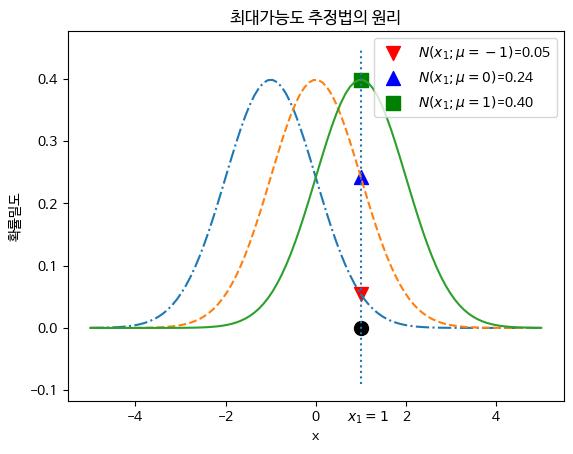

In [70]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v',
         label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^',
         label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s',
         label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()

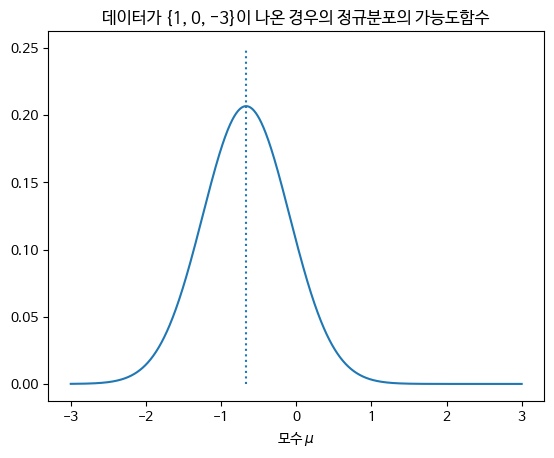

In [71]:
mu = np.linspace(-3, 3, 1000)
sigma2 = 1

def likelihood(mu):
    return (2 * np.pi * sigma2) ** (3 / 2) * np.exp(-(3 * mu ** 2 + 4 * mu + 10) / (2 * sigma2))

li = likelihood(mu)

plt.plot(mu, li)
plt.vlines(-2/3, 0, 0.25, linestyles=":")
plt.xlabel(r"모수 $\mu$")
plt.title("데이터가 {1, 0, -3}이 나온 경우의 정규분포의 가능도함수")
plt.show()

# **3. MAP 실습**

- 파이썬

In [32]:
def seq(start, stop, step):
    """
    수열 만들기
    입력값: start(시작 값), stop(끝 값), step(한 스텝당 증가 수)
    출력값: res(리스트)
    """
    res = []
    current = start
    while current < stop:
        res.append(current)
        current += step
    return res

def factorial(x):
    """
    팩토리얼 함수
    입력값: 정수 x
    출력값: x!
    """
    x_list = list(range(1, x+1))
    res = 1
    for val in x_list:
        res *= val
    return res

def combination(n, x):
    """
    조합
    입력값: n, x
    출력값: nCx(실수)
    """
    res = factorial(n)/(factorial(x)*factorial(n-x))
    return res

def gamma_function(alpha, x):
    """
    감마 함수
    입력값: alpha, x
    출력값: res(실수)
    """
    e = 2.7182818284
    res = (x**(alpha-1))*(e**(-x))
    return res


def gamma(alpha):
    """
    감마
    입력값: alpha
    출력값: res(실수)
    """
    a = 0
    b = 100
    x_list = seq(0.0001, 100, 0.001)
    gamma_list = []
    for x in x_list:
        y = gamma_function(alpha, x)
        gamma_list.append(y)
    res = ((b-a)/len(x_list))*sum(gamma_list)
    return res

In [33]:
# 만약 내가 가진 사전 분포가 알파=10, 베타=10인 베타분포라고 합시다.
# 그럼 이때 우리가 추정하고자 할 p가 0.1인 경우 해당 데이터가 관측될 확률(post_prob)은 다음과 같다

alpha = 10
beta = 10
p = 0.1

n = 38
x = 27

beta_function = gamma(alpha+beta)/(gamma(alpha)*gamma(beta))
prior_prob = beta_function*(p**(alpha-1))*((1-p)**(beta-1))
likelihood = combination(n,x)*(p**x)*((1-p)**(n-x))
post_prob = likelihood*prior_prob

In [34]:
print(prior_prob)

0.00035789129932797207


In [35]:
print(likelihood)

3.7761528448566324e-19


In [36]:
print(post_prob)

1.3514522481067584e-22


In [37]:
alpha = 10
beta = 10
p_list = seq(0, 1, 0.01)

n = 38
x = 27
post_probs = []

for p in p_list:
    beta_function = gamma(alpha+beta)/(gamma(alpha)*gamma(beta))
    prior_prob = beta_function*(p**(alpha-1))*((1-p)**(beta-1))
    likelihood = combination(n,x)*(p**x)*((1-p)**(n-x))
    post_prob = likelihood*prior_prob
    post_probs.append(post_prob)

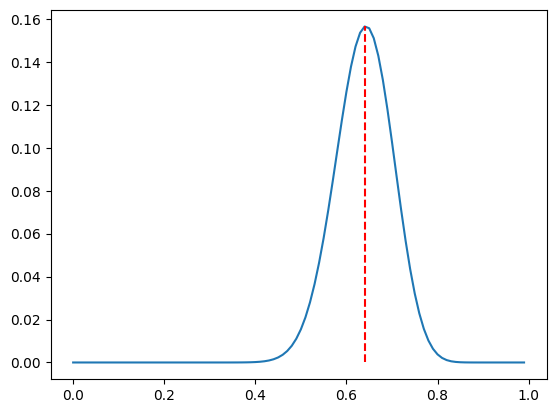

In [38]:
import matplotlib.pyplot as plt

max_prob = max(post_probs)
max_idx = post_probs.index(max_prob)
max_p = p_list[max_idx]

plt.plot(p_list, post_probs)
plt.vlines(max_p, 0, max_prob, color="red", linestyle="--")
plt.show()

In [39]:
print(max_prob)

0.15648747931274903


In [40]:
print(max_idx)

64


In [41]:
post_probs[64]

0.15648747931274903

In [42]:
p_list[64]

0.6400000000000003

- 라이브러리

In [43]:
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
import matplotlib.pyplot as plt

In [44]:
a = 10
b = 10
p = 0.1

n = 38
x = 27

prior_prob = beta.pdf(p, a=a, b=b)
likelihood = binom.pmf(k=x, n=n, p=p)
post_prob = likelihood*prior_prob

In [45]:
print(prior_prob)
print(likelihood)
print(post_prob)

0.0003578912993284205
3.776152844856644e-19
1.3514522481084558e-22


In [46]:
a = 10
b = 10
p_list = np.arange(0, 1, 0.01)

n = 38
x = 27
post_probs = []

for p in p_list:
    prior_prob = beta.pdf(p, a=a, b=b)
    likelihood = binom.pmf(k=x, n=n, p=p)
    post_prob = likelihood*prior_prob
    post_probs.append(post_prob)

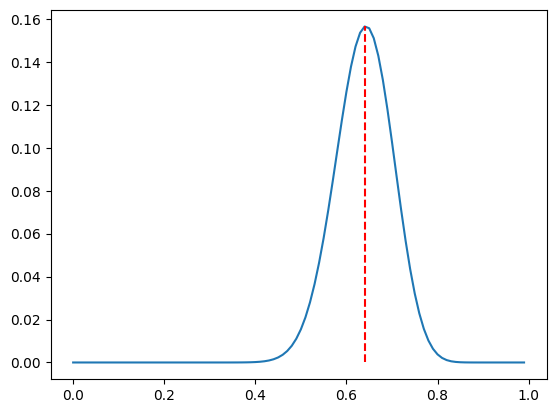

In [47]:
max_prob = max(post_probs)
max_idx = post_probs.index(max_prob)
max_p = p_list[max_idx]

plt.plot(p_list, post_probs)
plt.vlines(max_p, 0, max_prob, color="red", linestyle="--")
plt.show()

In [48]:
print(max_prob)

0.15648747931294518


In [49]:
print(max_idx)

64


In [50]:
post_probs[64]

0.15648747931294518

In [51]:
p_list[64]

0.64

# **4. 추정과 검정**

In [52]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.stats as ss
from scipy import linalg as la

scipy.__version__

'1.11.2'

## **4-1. 추정**

- 표준 정규분포에서 90%, 95%, 99% 신뢰수준에 해당하는 분위수를 구해보자.

In [54]:
# 90%, 95%, 99% 신뢰수준에 해당하는 분위수
confidence_level = np.array([0.9, 0.95, 0.99])
alpha = 1 - confidence_level
z_alpha_over_2 = ss.norm.ppf(1-alpha/2)
z_alpha_over_2.round(3)

array([1.645, 1.96 , 2.576])

## **4-2. 검정**

- $K_{1}=1-Φ({{75-\theta} \over {2}})$ 검증력 함수의 $\theta$값이 [70, 84]일 때의 함수를 그래프로 그려보고, 기각확률과 기각역을 계산해보자.

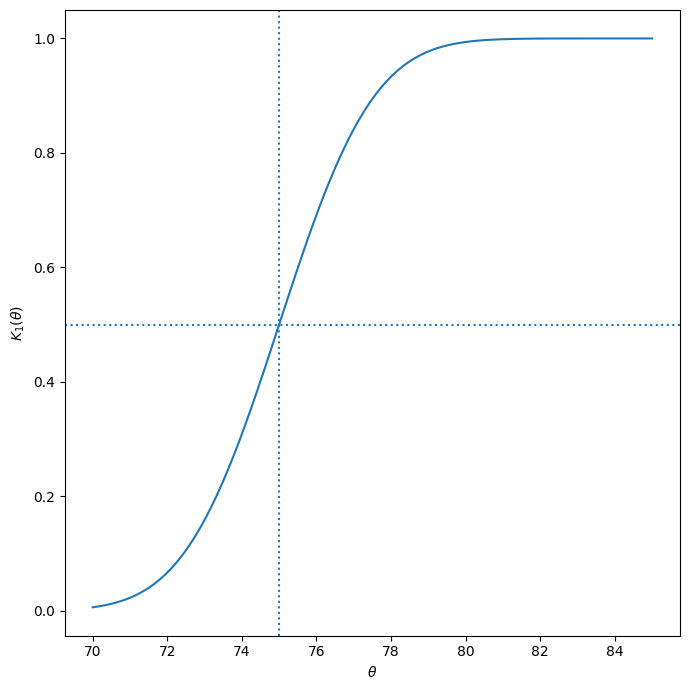

In [55]:
# 검정력 함수
theta = np.linspace(70, 85, 100)
power = 1 - ss.norm.cdf((75-theta)/2)

fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(theta, power)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$K_1 (\theta)$')

ax.axhline(y=1/2, ls=':')
ax.axvline(x=75, ls=':')

plt.tight_layout()

In [56]:
# 기각확률 계산
rej_prob = 1 - ss.norm.cdf((78-77)/2)
rej_prob.round(3)

0.309

In [57]:
# 기각확률에 대응하는 분위수 계산
rej_probs = np.array([0.159, 0.841])
rej_points = ss.norm.ppf(rej_probs)
rej_points.round(3)

array([-0.999,  0.999])

In [58]:
# 기각확률의 계산
theta = np.array([73, 75, 77, 79])
rej_probs = 1 - ss.norm.cdf((76-theta)/1)
rej_probs.round(3)

array([0.001, 0.159, 0.841, 0.999])

In [59]:
# 기각역의 계산
alpha  = 0.05
ppf = ss.norm.ppf(alpha)
c = 75 + ppf * 9.4/np.sqrt(100)
c.round(3)

73.454

In [60]:
# 확률 계산
ss.norm.cdf((73.5-75)/9.4*np.sqrt(100)).round(3)

0.055

## **4-3. 검정 통계량**

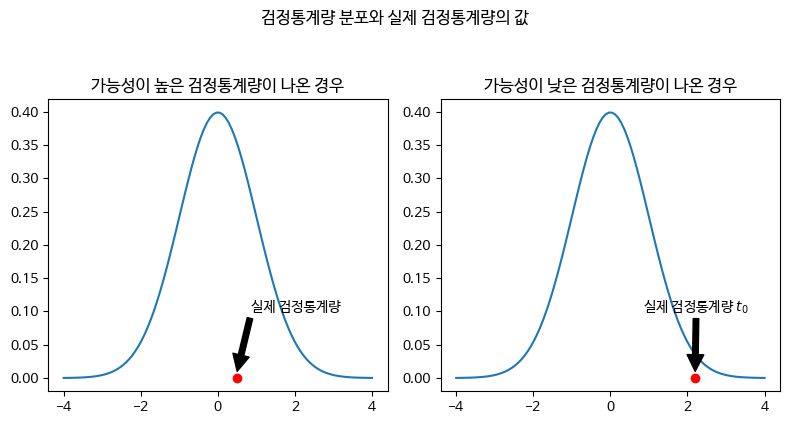

In [72]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

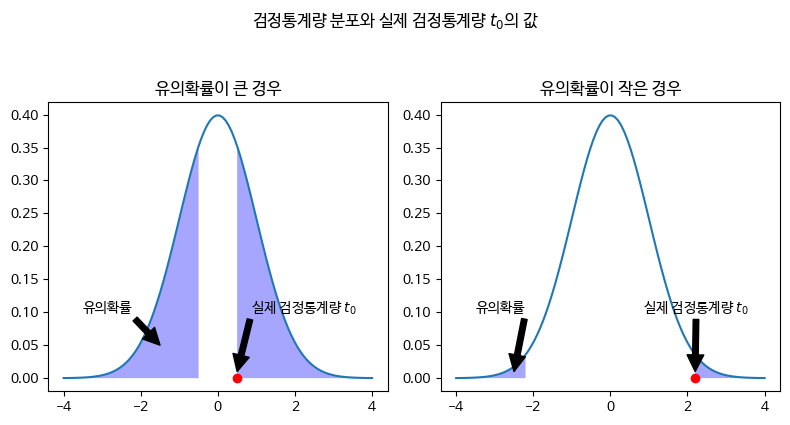

In [73]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

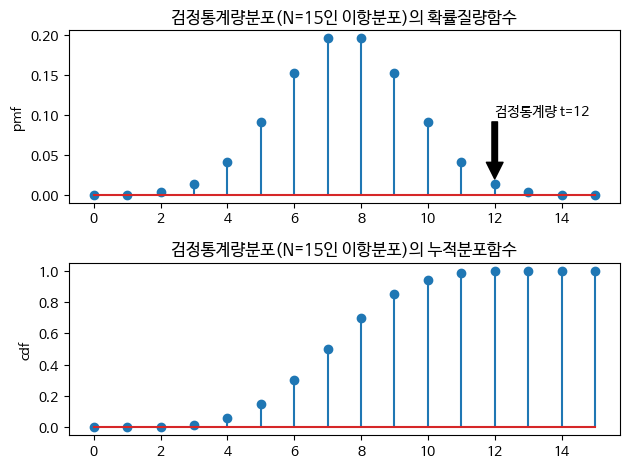

In [74]:
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정통계량분포(N=15인 이항분포)의 확률질량함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정통계량분포(N=15인 이항분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [75]:
2 * (1 - rv.cdf(12 - 1))

0.03515625

In [76]:
1 - rv.cdf(12 - 1)

0.017578125

In [77]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
t

-1.4025921414082105

In [78]:
sp.stats.t(df=4).cdf(t)

0.11669216509589829

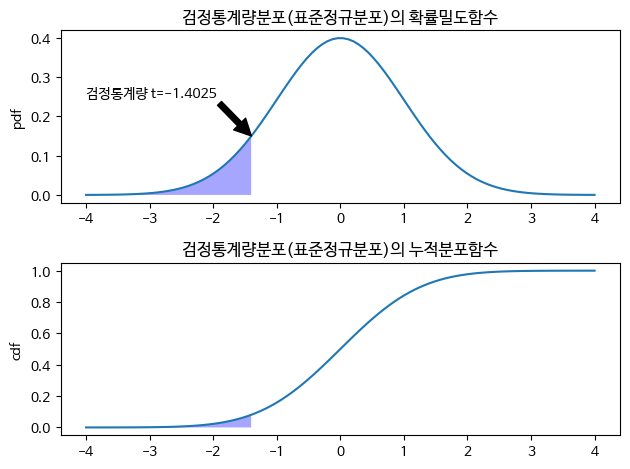

In [79]:
rv = sp.stats.norm()

xx = np.linspace(-4, 4, 100)

plt.subplot(211)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=-1.4025', xy=(-1.4, 0.15), xytext=(-4, 0.25), arrowprops=black)
xx2 = np.linspace(-4, -1.4025, 100)
plt.fill_between(xx2, rv.pdf(xx2), facecolor='blue', alpha=0.35)

plt.subplot(212)
plt.plot(xx, rv.cdf(xx))
plt.fill_between(xx2, rv.cdf(xx2), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()